<a href="https://colab.research.google.com/github/Sim-mi-gyeong/DataAnalysis/blob/main/TermProject03_Korea's_column_each_Year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotly

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 각각의 csv파일을 불러와 df20__ 값에 저장
df2017=pd.read_csv('/content/drive/MyDrive/dataset/2017.csv')
df2018=pd.read_csv('/content/drive/MyDrive/dataset/2018.csv')
df2019=pd.read_csv('/content/drive/MyDrive/dataset/2019.csv')
df2020=pd.read_csv('/content/drive/MyDrive/dataset/2020.csv')
df2021=pd.read_csv('/content/drive/MyDrive/dataset/2021.csv')

In [37]:
# 2018년 데이터 중 결측값을 해당 column의 평균값으로 대체
df2018['Perceptions of corruption']=df2018['Perceptions of corruption'].fillna(df2018['Perceptions of corruption'].mean())

In [5]:
df2018.isnull().sum()

Country                         0
Regional indicator              0
Score                           0
GDP per capita                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
# 각 연도별 DataFrame에 해당 연도에 따른 Year Column 추가
df2017['Year']=2017
df2018['Year']=2018
df2019['Year']=2019
df2020['Year']=2020
df2021['Year']=2021

# 5개년 DataFrame 병합
df=df2017.append([df2018, df2019, df2020, df2021])
df

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Afghanistan,South Asia,3.794,0.401477,0.180747,0.106180,0.311871,0.061158,2017
1,Albania,Central and Eastern Europe,4.644,0.996193,0.731160,0.381499,0.201313,0.039864,2017
2,Algeria,Middle East and North Africa,5.872,1.091864,0.617585,0.233336,0.069437,0.146096,2017
3,Argentina,Latin America and Caribbean,6.599,1.185295,0.695137,0.494519,0.109457,0.059740,2017
4,Armenia,Commonwealth of Independent States,4.376,0.900597,0.637524,0.198303,0.083488,0.026674,2017
...,...,...,...,...,...,...,...,...,...
138,Venezuela,Latin America and Caribbean,4.892,0.852000,0.574000,0.615000,-0.169000,0.827000,2021
139,Vietnam,Southeast Asia,5.411,0.817000,0.616000,0.940000,-0.098000,0.796000,2021
140,Yemen,Middle East and North Africa,3.658,0.329000,0.272000,0.602000,-0.147000,0.800000,2021
141,Zambia,Sub-Saharan Africa,4.073,0.528000,0.231000,0.782000,0.061000,0.823000,2021


In [39]:
# 전체 국가 중 한국의 row를 추출하여 df_Korea에 저장
df_Korea=df[df['Country']=='South Korea']
df_Korea

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
118,South Korea,East Asia,5.8380,1.401678,0.900214,0.257922,0.206674,0.063283,2017
118,South Korea,East Asia,5.8750,1.266000,0.955000,0.244000,0.175000,0.051000,2018
118,South Korea,East Asia,5.8950,1.301000,1.036000,0.159000,0.175000,0.056000,2019
118,South Korea,East Asia,5.8724,5.785993,0.799387,0.736027,0.612965,-0.043404,2020
118,South Korea,East Asia,5.8450,1.403000,0.801000,0.672000,-0.083000,0.727000,2021


In [9]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import plotly.express as px

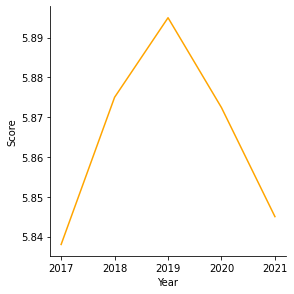

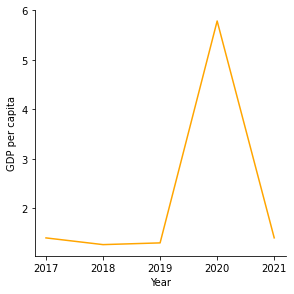

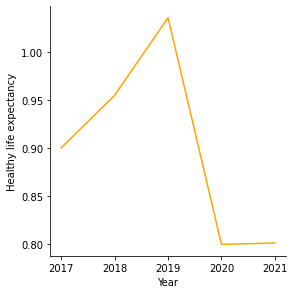

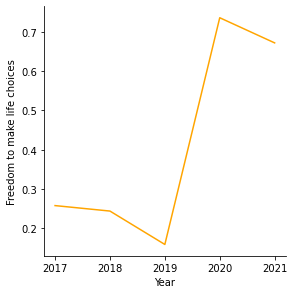

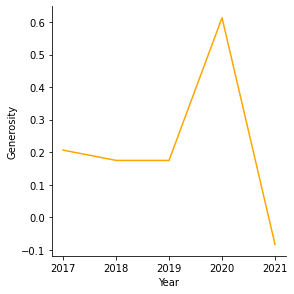

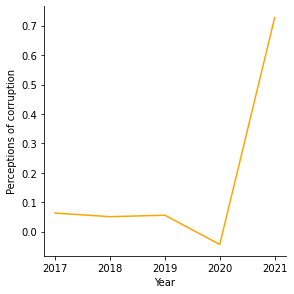

In [10]:
sns.relplot(data=df_Korea, kind='line', x='Year', y='Score', height=4, color='orange')
sns.relplot(data=df_Korea, kind='line', x='Year', y='GDP per capita', height=4, color='orange')
sns.relplot(data=df_Korea, kind='line', x='Year', y='Healthy life expectancy', height=4, color='orange')
sns.relplot(data=df_Korea, kind='line', x='Year', y='Freedom to make life choices', height=4, color='orange')
sns.relplot(data=df_Korea, kind='line', x='Year', y='Generosity', height=4, color='orange')
sns.relplot(data=df_Korea, kind='line', x='Year', y='Perceptions of corruption', height=4, color='orange')


In [43]:
# 한국의 연도별 각 Column값을 line plot으로 표시
plot1=go.Scatter(x=df_Korea['Year'],
                 y=df_Korea['Score'],
                 mode='lines+markers',
                 name='Score',
                 marker=dict(color='skyblue', size=5),
                 text=df_Korea.Year)

plot2=go.Scatter(x=df_Korea['Year'],
                 y=df_Korea['GDP per capita'],
                 mode='lines+markers',
                 name='GDP per capita',
                 marker=dict(color='orange', size=5),
                 text=df_Korea.Year)

plot3=go.Scatter(x=df_Korea['Year'],
                 y=df_Korea['Healthy life expectancy'],
                 mode='lines+markers',
                 name='Healthy life expectancy',
                 marker=dict(color='green', size=5),
                 text=df_Korea.Year)

plot4=go.Scatter(x=df_Korea['Year'],
                 y=df_Korea['Freedom to make life choices'],
                 mode='lines+markers',
                 name='Freedom to make life choices',
                 marker=dict(color='pink', size=5),
                 text=df_Korea.Year)

plot5=go.Scatter(x=df_Korea['Year'],
                 y=df_Korea['Generosity'],
                 mode='lines+markers',
                 name='Generosity',
                 marker=dict(color='yellow', size=5),
                 text=df_Korea.Year)


plot6=go.Scatter(x=df_Korea['Year'],
                 y=df_Korea['Perceptions of corruption'],
                 mode='lines+markers',
                 name='Perceptions of corruption',
                 marker=dict(color='red', size=5),
                 text=df_Korea.Year)

data=[plot1, plot2, plot3, plot4, plot5, plot6]
layout = go.Layout(title="Korea's Column Values according to the year(2017-2021)", xaxis=dict(title='Year'), yaxis=dict(title='Value'), titlefont=dict(size=17, color='tan'))
go.Layout()
fig=dict(data=data, layout=layout)
iplot(fig)